# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [235]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to check these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [236]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,$13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,$30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,$33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,$23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,$34.58,3908451377344,46,Urban


## Challenge Deliverable 1. Generate a Ride-Sharing DataFrame by City Type

In [237]:
#  1. Get the total rides for each city type
groupby_type_df = pyber_data_df.groupby("type")
total_type_rides = groupby_type_df["ride_id"].count()
total_type_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [238]:
##WRONG OUTPUT## # 2. Get the total drivers for each city type
total_type_drivers = groupby_type_df["driver_count"].sum()
total_type_drivers

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [239]:
#  3. Get the total amount of fares for each city type
total_type_fares = groupby_type_df["fare"].sum()
total_type_fares

type
Rural       $4,327.93
Suburban   $19,356.33
Urban      $39,854.38
Name: fare, dtype: float64

In [240]:
#  4. Get the average fare per ride for each city type. 
avg_type_fare_ride = total_type_fares / total_type_rides
avg_type_fare_ride

type
Rural      $34.62
Suburban   $30.97
Urban      $24.53
dtype: float64

In [241]:
# 5. Get the average fare per driver for each city type. 
avg_type_fare_driver = total_type_fares / total_type_drivers
avg_type_fare_driver

type
Rural      $8.06
Suburban   $2.26
Urban      $0.67
dtype: float64

In [242]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.concat([total_type_rides, total_type_drivers, total_type_fares, avg_type_fare_ride, avg_type_fare_driver], axis=1)
pyber_summary_df.rename(columns={"ride_id":"Total Rides", "driver_count":"Total Drivers", "fare":"Total Fares", 0:"Average Fare per Ride", 1:"Average Fare per Driver"}, inplace=True)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,8570,"$19,356.33",$30.97,$2.26
Urban,1625,59602,"$39,854.38",$24.53,$0.67


In [243]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [244]:
#  8. Format the columns.
pd.options.display.float_format = '${:,.2f}'.format
pyber_summary_df['Total Rides']= pyber_summary_df['Total Rides'].apply('{:,}'.format)
pyber_summary_df['Total Drivers']= pyber_summary_df['Total Drivers'].apply('{:,}'.format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,"8,570","$19,356.33",$30.97,$2.26
Urban,"1,625","59,602","$39,854.38",$24.53,$0.67


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [245]:
# Print the merged DataFrame for reference.
pyber_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,$13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,$30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,$33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,$23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,$34.58,3908451377344,46,Urban


In [246]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_df = pyber_df.groupby(["type", "date"]).sum("fare")

In [247]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
pyber_df = pyber_df.reset_index()
pyber_df

,type,date,fare,ride_id,driver_count
0,Rural,2019-01-01 09:45:36,$43.69,2424875833354,1
1,Rural,2019-01-02 11:18:32,$52.12,3454018971635,1
2,Rural,2019-01-03 19:51:01,$19.90,5559509612597,8
3,Rural,2019-01-04 03:31:26,$24.88,4195619112933,8
4,Rural,2019-01-06 07:38:40,$47.33,3849747342021,4
...,...,...,...,...,...
2370,Urban,2019-05-08 04:20:00,$21.99,117997692054,52
2371,Urban,2019-05-08 04:39:49,$18.45,1811574736337,11
2372,Urban,2019-05-08 07:29:01,$18.55,5682021476085,33
2373,Urban,2019-05-08 11:38:35,$19.77,7837163332630,4


In [248]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_df = pyber_df.pivot(index="date", columns="type", values="fare")

In [249]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-28'.
##ERROR - NOT RETURNING ANY VALUES##
pyber_date_df = pyber_df.loc['2019-01-01':'2019-04-28']
pyber_date_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,$37.91
2019-01-01 00:46:46,NaN,$47.74,NaN
2019-01-01 02:07:24,NaN,$24.07,NaN
2019-01-01 03:46:50,NaN,NaN,$7.57
2019-01-01 05:23:21,NaN,NaN,$10.75
...,...,...,...
2019-04-27 17:58:27,$14.01,NaN,NaN
2019-04-27 19:45:48,NaN,$28.84,NaN
2019-04-27 20:41:36,NaN,NaN,$8.28


In [250]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
pyber_date_df.index = pd.to_datetime(pyber_date_df.index)

In [251]:
# 6. Check that the datatype for the index is datetime using df.info()
pyber_date_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [257]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_week_df = pyber_date_df.resample('W').sum()
pyber_week_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,$187.92,$721.60,"$1,661.68"
2019-01-13,$67.65,"$1,105.13","$2,050.43"
2019-01-20,$306.00,"$1,218.20","$1,939.02"
2019-01-27,$179.69,"$1,203.28","$2,129.51"
2019-02-03,$333.08,"$1,042.79","$2,086.94"
2019-02-10,$115.80,$974.34,"$2,162.64"
2019-02-17,$95.82,"$1,045.50","$2,235.07"
2019-02-24,$419.06,"$1,412.74","$2,466.29"
2019-03-03,$175.14,$858.46,"$2,218.20"


<AxesSubplot:title={'center':'Total Fare by City Type'}, xlabel='date', ylabel='Fare($USD)'>

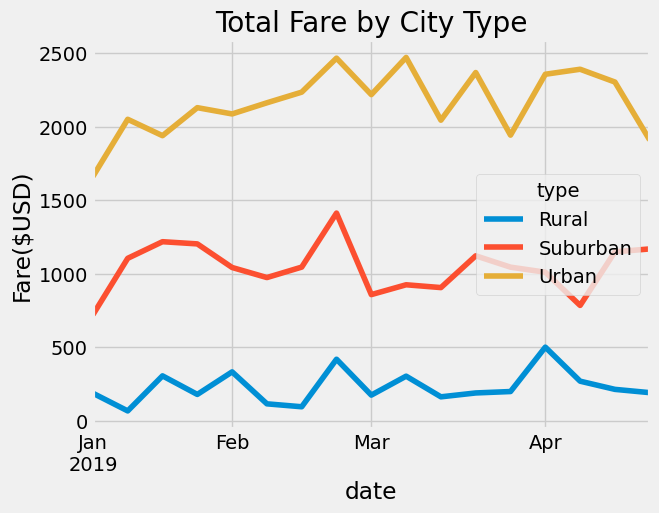

In [264]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
line_chart = pyber_week_df.plot.line()
plt.title("Total Fare by City Type")
plt.ylabel("Fare($USD)")
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

plt.savefig("analysis/PyBer_fare_summary.png")
line_chart